In [176]:
# Importing libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns

In [177]:
# Loading dataset
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [178]:
# Number of images in training set
len(X_train) 

60000

In [179]:
# Dimension of image in training set
X_train[2].shape 

(28, 28)

In [180]:
# Shape of training set (including number of data points and dimension of each data point)
X_train.shape 

(60000, 28, 28)

In [181]:
# Number of images in test set
len(X_test)

10000

In [182]:
# Dimension of image in test set
X_test[8].shape

(28, 28)

In [183]:
# Shape of test set (including number of data points and dimension of each data point)
X_test.shape

(10000, 28, 28)

In [184]:
# 3rd value of training set in array format
X_train[8]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   5,
         63, 197,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [185]:
# Scaling training and testing values 
X_train = X_train/255
X_test = X_test/255

In [186]:
X_train[2]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

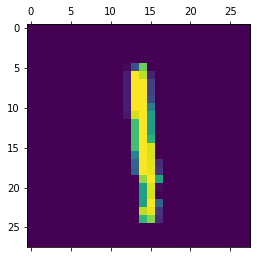

In [187]:
# 3rd value of training set in image format
plt.matshow(X_train[8])

In [188]:
# output value of the 3rd input
y_train[8]

1

In [189]:
# Setting neural network
model = Sequential ([
    Flatten(input_shape=(28,28)),
    Dense(units=100, activation='relu'),
    Dense(units=10, activation='sigmoid')
])

model.compile(
    optimizer=Adam(learning_rate=1e-3), 
    loss=SparseCategoricalCrossentropy(), 
    metrics=['accuracy']
)

a = model.fit(X_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3042 - accuracy: 0.9134 - val_loss: 0.1619 - val_accuracy: 0.9543
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1398 - accuracy: 0.9586 - val_loss: 0.1360 - val_accuracy: 0.9595
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0980 - accuracy: 0.9719 - val_loss: 0.1111 - val_accuracy: 0.9688
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0760 - accuracy: 0.9773 - val_loss: 0.1035 - val_accuracy: 0.9705
Epoch 5/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0578 - accuracy: 0.9825 - val_loss: 0.1007 - val_accuracy: 0.9707


In [190]:
# Check the accuracy rate
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0941 - accuracy: 0.9715


[0.0941014289855957, 0.9714999794960022]

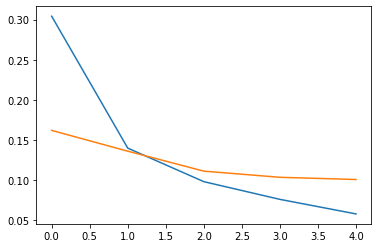

In [191]:
plt.plot(a.history['loss'])
plt.plot(a.history['val_loss'])

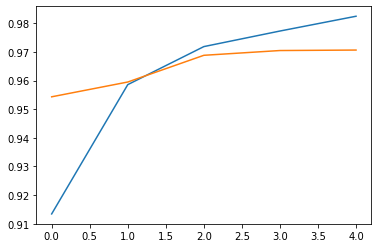

In [192]:
plt.plot(a.history['accuracy'])
plt.plot(a.history['val_accuracy'])

In [193]:
# Predicting probabilistic y predicted value
y_predicted = model.predict(X_test)
y_predicted[0]

313/313 [==============================] - 1s 2ms/step


array([2.1286216e-02, 1.3986329e-04, 9.2721361e-01, 9.2965651e-01,
       1.0316563e-05, 1.2944094e-03, 5.1704484e-07, 9.9998778e-01,
       5.6812137e-02, 4.4335273e-01], dtype=float32)

In [194]:
# Changing probabilistic value to normal value
y_predicted1 = [np.argmax(i) for i in y_predicted]
y_predicted1[0]

7

Text(51.0, 0.5, 'Actual')

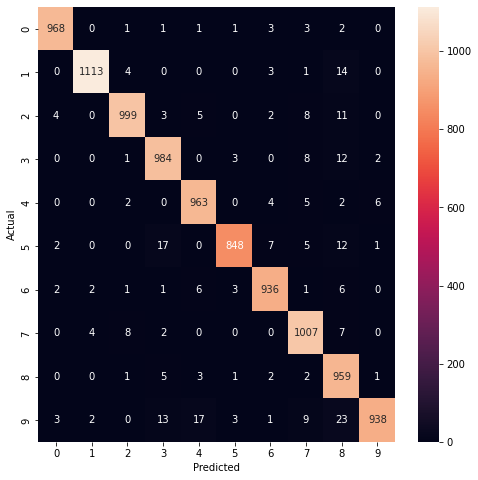

In [195]:
# Creating confusion matrix
plt.figure(figsize=(8,8))
sns.heatmap(tf.math.confusion_matrix(y_test, y_predicted1), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')